# Data Visualization

This demo uses covers various way so to visualize your health data. Follow the steps below to create a `FulcraAPI` instance, authorize it, and retrive data from the API to generate interesting graphs.

# Connecting and Retrieving Your Data

> This notebook is an introduction to accessing your data using the Fulcra
Data API.

This uses the `fulcra-api-python` module, which is available on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).

**Note:** *the output from this step may include pip dependency resolver errors; you can ignore these and move onto the next cell*

In [1]:
%pip install -qU fulcra-api

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fulcra_api.core import FulcraAPI
import seaborn as sns

fulcra = FulcraAPI()

## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded"
displayed in the notebook output.  


In [3]:
fulcra.authorize()

## Retrieving Time Series Data

Once your `FulcraAPI` instance is authorized, you can now use it
to make API calls.

The `time_series_grouped` function returns a Pandas dataframe.

### Available Metrics
The a comprehensive list of available metrics and their descriptions can be found in the [Fulcra Knowledge Base](https://support.fulcradynamics.com/en/articles/8291012-what-metrics-are-available-via-the-fulcra-data-service).

In [4]:
# Try changing the start/end times
start = '2023-09-01 04:00:00.000Z';
end = '2023-09-15 04:00:00.000Z';

# List of metrics to pass to the time_series_grouped method
metric_names = [
    'StepCount',
    'HeartRate',
    'ActiveCaloriesBurned',
    'AppleWatchExerciseTime'
]

# Get data from Fulcra API
# Note: omit sample rate to use default of one second
df = fulcra.time_series_grouped(
    start_time = start,
    end_time = end,
    metrics = metric_names
)

# inspect returned data frame
df

,step_count,heart_rate,heart_rate_src,active_calories_burned,apple_watch_exercise_time
time,,,,,
2023-09-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-01 04:01:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-01 04:02:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-01 04:03:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-01 04:04:00+00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-09-15 03:55:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-15 03:56:00+00:00,NaN,NaN,NaN,NaN,NaN
2023-09-15 03:57:00+00:00,NaN,NaN,NaN,NaN,NaN


## Adding Date-Related Columns
Add columns to the dataframe so we have more date-related information to use when creating various charts.

In [5]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekdayName'] = df.index.day_name()
df['weekday'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['weekend'] = df.index.weekday // 5 == 1
df['date'] = df.index
df['hour'] = df.index.hour

## Boxplot Demo: Day of Month

Now we can plot the min and max heart rate for each day using the `sns.boxplot()` method and the data retrieved from the `FulcraAPI`.

**Note:** *for this to work properly, make sure the time range for the data frame only includes a single month.*

Text(0.5, 1.0, 'Min / Max Heart Rate over Month')

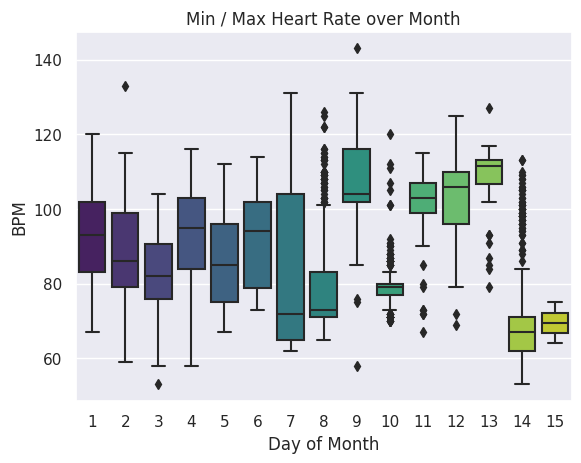

In [11]:
# create boxplot
boxplot = sns.boxplot(data=df, x='day', y='heart_rate', palette='viridis')

# set x/y axis labels
boxplot.set(xlabel='Day of Month', ylabel='BPM')

# set chart title
boxplot.set_title('Min / Max Heart Rate over Month')

## Boxplot Demo: Day of Week

Same as above, but grouping by day of week instead of showing each day of the month:

Text(0.5, 1.0, 'Min / Max Heart Rate by Weekday')

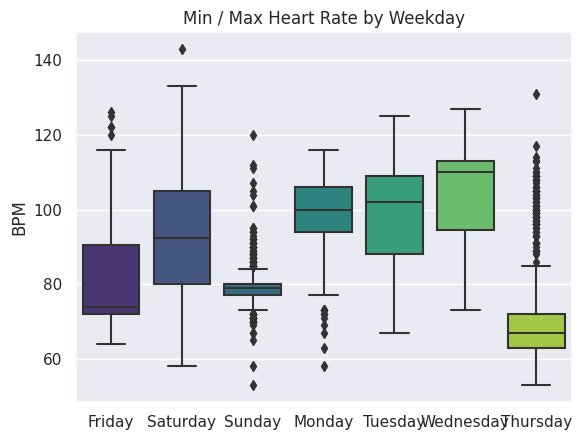

In [12]:
# create boxplot
boxplot = sns.boxplot(data=df, x='weekdayName', y='heart_rate', palette='viridis')

# set x/y axis labels
boxplot.set(xlabel='', ylabel='BPM')

# set chart title
boxplot.set_title('Min / Max Heart Rate by Weekday')

## Box Plot with Swarm Plot Overlay

In this next example we'll demonstrate how you can overlay a swarm plot to view the specific data points that generate the box plot from above:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.3% of the points cannot be placed;

Text(0.5, 1.0, 'Min / Max Heart Rate')

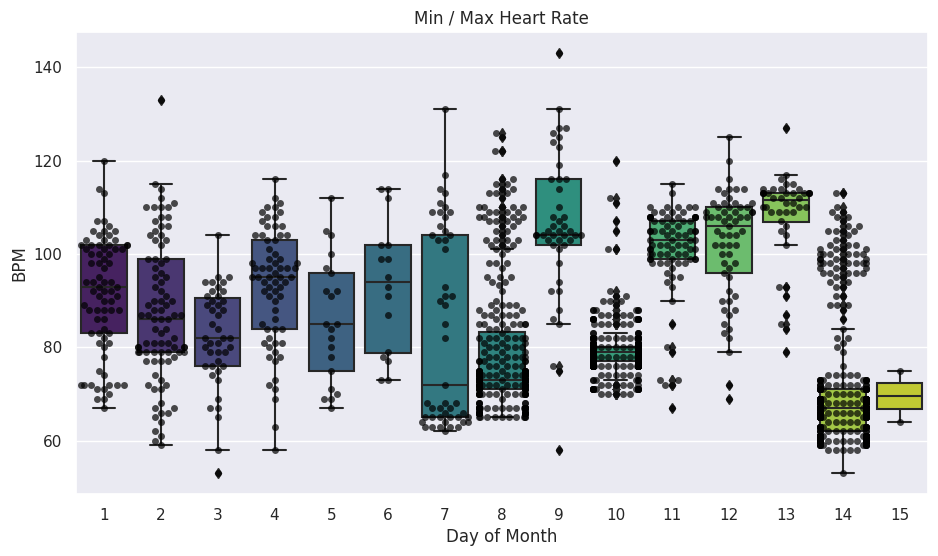

In [13]:
from matplotlib import pyplot as plt

# Set figure size with matplotlib
plt.figure(figsize=(11,6))

# Create plot
sns.boxplot(
    x='day',
    y='heart_rate',
    data=df,
    palette='viridis'
).set(xlabel='Day of Month', ylabel='BPM')

sns.swarmplot(
    x='day',
    y='heart_rate',
    data=df,
    color='k', # Make points black
    alpha=0.7  # and slightly transparent
)

# Set title with matplotlib
plt.title('Min / Max Heart Rate')

# Compare Heart Rate Data Across Months

Let's get Heart Rate time series data that spans the beginning of July to the end of September. We can create a boxplot (similar to above) that uses the `hue` argument to separate each day by month.

In [15]:
# Get Heart Rate data from Fulcra API that spans beginning of July to end of September
# Note: omit sample rate to use default of one second
df2 = fulcra.time_series_grouped(
    start_time = '2023-07-01 04:00:00.000Z',
    end_time = '2023-09-30 04:00:00.000Z',
    metrics = [
      'HeartRate',
    ]
)

# set day and month columns for convenience
df2['day'] = df2.index.day
df2['month_name'] = df2.index.month_name()

# inspect returned data frame
df2

,heart_rate,heart_rate_src,day,month_name
time,,,,
2023-07-01 04:00:00+00:00,NaN,NaN,1,July
2023-07-01 04:01:00+00:00,NaN,NaN,1,July
2023-07-01 04:02:00+00:00,NaN,NaN,1,July
2023-07-01 04:03:00+00:00,NaN,NaN,1,July
2023-07-01 04:04:00+00:00,NaN,NaN,1,July
...,...,...,...,...
2023-09-30 03:55:00+00:00,NaN,NaN,30,September
2023-09-30 03:56:00+00:00,NaN,NaN,30,September
2023-09-30 03:57:00+00:00,NaN,NaN,30,September


Text(0.5, 1.0, 'Min / Max Heart Rate (Jul –\xa0Sep)')

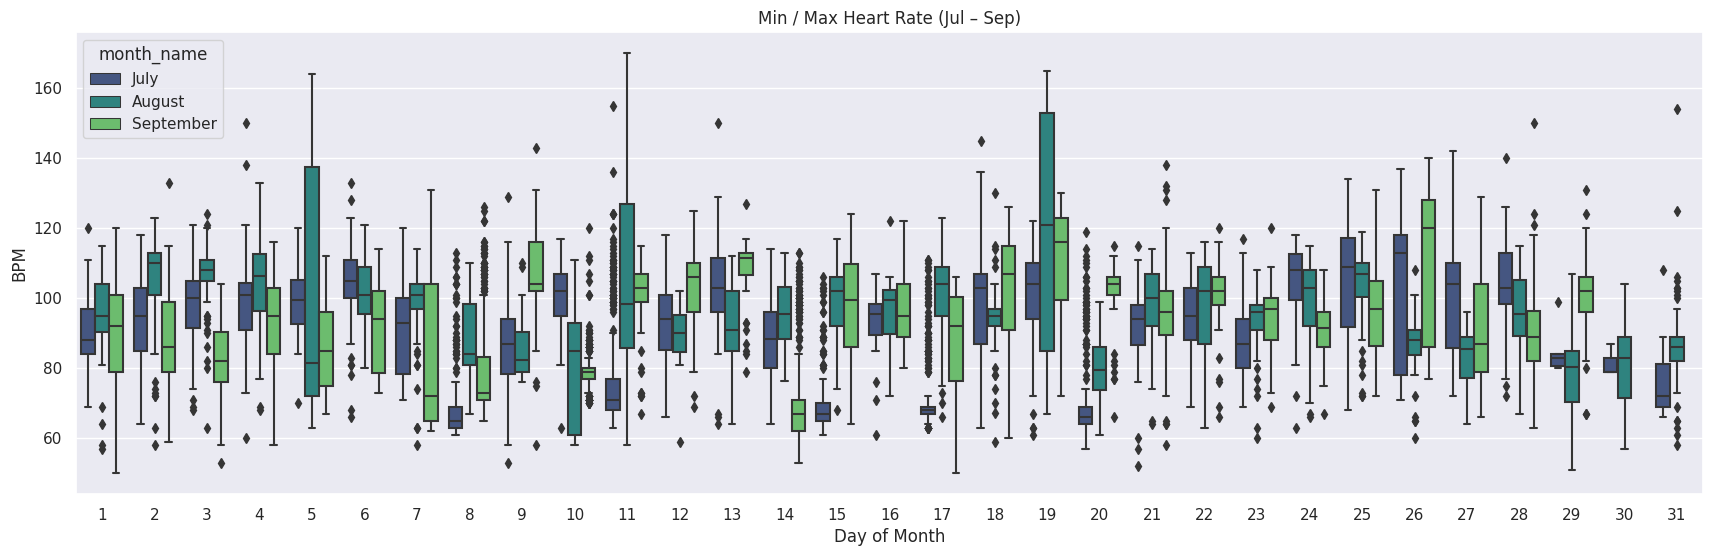

In [16]:
from matplotlib import pyplot as plt

# Set figure size with matplotlib
plt.figure(figsize=(21,6))

# create boxplot
boxplot2 = sns.boxplot(data=df2, x='day', y='heart_rate', hue='month_name', palette='viridis')

# set x/y axis labels
boxplot2.set(xlabel='Day of Month', ylabel='BPM')

# set chart title
plt.title('Min / Max Heart Rate (Jul – Sep)')

# Radial Plot

Let's use the first data frame to display a radial plot, showing the total number of steps for each weekday over the two-week period.

We'll create a new data frame that we can use to more easily display a radial plot.

In [17]:
health_df = df.drop(['heart_rate', 'heart_rate_src', 'apple_watch_exercise_time'], axis='columns')
health_df.reset_index(inplace=True)

health_df['day'] = health_df.time.dt.day_name()

input_df = health_df.groupby(['day']).sum()
input_df = input_df[['step_count', 'active_calories_burned']].reset_index()

input_df

<ipython-input-17-f96157f2c5da>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  input_df = health_df.groupby(['day']).sum()


,day,step_count,active_calories_burned
0,Friday,78100.130409,6165.312940
1,Monday,90942.124560,5853.476504
2,Saturday,69544.156370,4963.276385
3,Sunday,45475.454918,3631.453854
4,Thursday,70816.843942,6010.358087
5,Tuesday,55560.514234,3651.711043
6,Wednesday,54858.130769,4018.142080


## Radial Plot Function

Now we'll define a function that can plot a radial chart with a provided data frame:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

pal = list(sns.color_palette(palette='viridis', n_colors=health_df.day.nunique()).as_hex())
lowerLimit = 0
max_steps = health_df['step_count'].max()
list_days = health_df['day'].unique()

def radial_plot(input_df, column_name, title):
    input_df.reset_index(inplace=True, drop=True)
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)
    plt.axis()

    heights = input_df[column_name]
    width = 2*np.pi / len(input_df.index)

    indexes = list(range(1, len(input_df.index)+1))
    angles = [element * width for element in indexes]

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                  linewidth=1, edgecolor="white", color=pal)

    labelPadding = 2

    for bar, angle, height, label in zip(bars, angles, heights, list_days):
        rotation = np.rad2deg(angle)
        alignment = ""

        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else:
            alignment = "left"

        ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
                s=label, ha=alignment, va='center', rotation=rotation,
                rotation_mode="anchor")

        ax.set_thetagrids([], labels=[])
        plt.title(title)
    return ax

<PolarAxes: title={'center': 'Step Count 9/1/23 –\xa09/15/23'}>

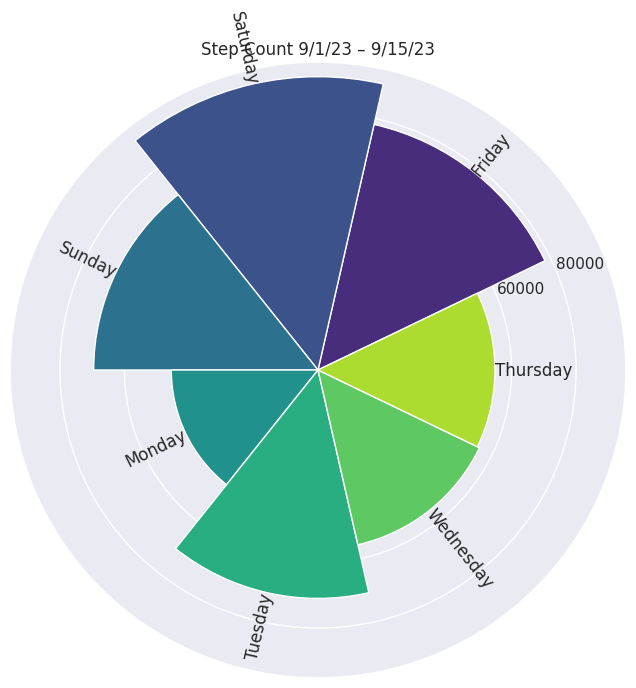

In [19]:
radial_plot(input_df, 'step_count', 'Step Count 9/1/23 – 9/15/23')